## EDA
### - Part 1 - Ran minibatch kmeans, kmeans and yellowbrick kmeans to find a cluster number that could
### interesting to do clustering on.
###
### - Part 2 - Ran TSNE and silhouette plot to pick a cluster number to try 

In [1]:
# start part 1 find optimal cluster number: load data 

In [2]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_excel('./data/aug18slogan.xlsx')

In [4]:
df.head()

,COMPANY,SLOGAN,SectorId,URL,Telecommunication Services,GICS_SubIndustry,WORDS,Unnamed: 7
0,3M Company,Science. Applied to life.,20,3M Company,Industrials,Industrial Conglomerates,4.0,NaN
1,A&P,"At the A&P, we watch our P's and Q's.",30,A&P,Consumer Staples,NaN,NaN,
2,Abbott Laboratories,Life. To the fullest.,35,Abbott Laboratories,Health Care,Health Care Equipment,4.0,NaN
3,AbbVie,People. Passion. Possibilities.,35,AbbVie Inc.,Health Care,Pharmaceuticals,3.0,NaN
4,ABN AMRO Bank,Making More Possible,40,NaN,Financials,NaN,NaN,NaN


In [5]:
X = df['SLOGAN']
y = df['SectorId']

In [6]:
# cleaning the text same routing as in Prediction notebook
from nltk.corpus import stopwords
from nltk.stem import porter
import string
stemmer = porter.PorterStemmer()

stopwords = stopwords.words()

def clean_text(text):
    cleaned_text = []
    for post in text:
        cleaned_words = []
        post = post.replace("’",'')
        for punc in string.punctuation:
            post = post.replace(punc,'')
        for word in post.split():
            low_word = stemmer.stem(word.lower())
            if low_word not in stopwords:
                cleaned_words.append(low_word)
        cleaned_text.append(' '.join(cleaned_words))
    return cleaned_text

clean_text(['BOB the builder', 'is a strange', 'caRtoon type thing'])

cleaned_text = clean_text(X)

In [7]:
# vectorizing the text 
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 2), max_df = 0.6, max_features=2000, 
                                   token_pattern="\\b[a-z][a-z]+\\b")

cv_data = count_vectorizer.fit_transform(cleaned_text)

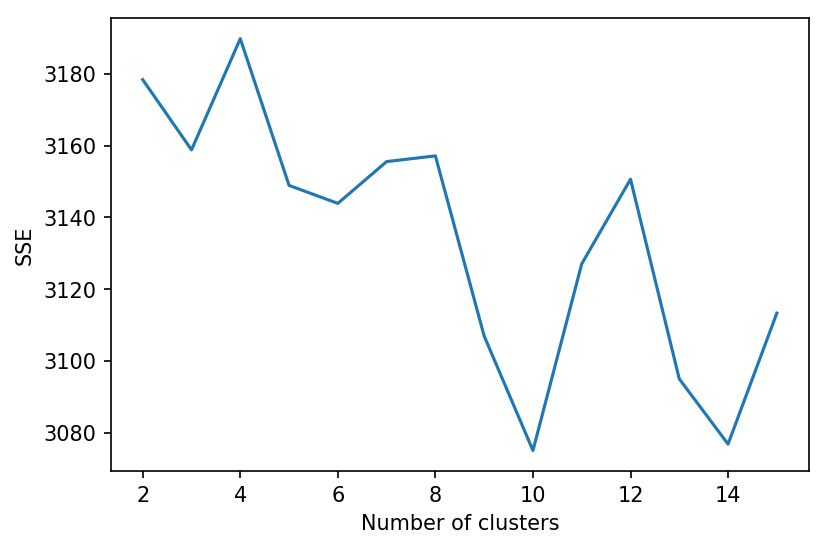

In [8]:
# let us use first use minibatchkmeans
from sklearn.cluster import MiniBatchKMeans
SSEs = []
for k in range(2,16):
    km = MiniBatchKMeans(n_clusters=k, random_state=2)
    km.fit(cv_data)
    labels = y
    SSEs.append(km.inertia_) 
    
plt.figure(dpi=150)    
plt.xlabel("Number of clusters")  
plt.ylabel("SSE")
plt.plot(range(2,16), SSEs);

plt.savefig("sse_clusters")

In [9]:
# looks like 10 clusters would be ideal - 3  and 6 also show minimum characteristics
# let's now try kmeans 
# Load the data and create document vectors based on frequency
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf  = TfidfVectorizer()
docs   = tfidf.fit_transform(X)
labels = y  # 1 to 11 1 consumer 11 rit

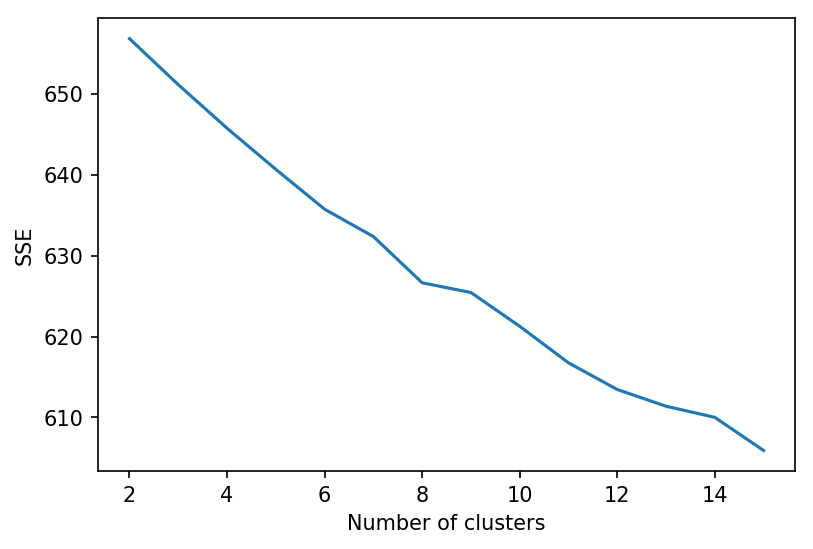

In [10]:
# let us use first use Kmeans with Tdif
from sklearn.cluster import KMeans
SSEs = []
for k in range(2,16):
    km2 = KMeans(n_clusters=k, random_state=2)
    km2.fit(docs)
    labels = y
    SSEs.append(km2.inertia_) 
    
plt.figure(dpi=150)    
plt.xlabel("Number of clusters")  
plt.ylabel("SSE")
plt.plot(range(2,16), SSEs);

plt.savefig("sse_clusters")
# does not provide indication on cluster number

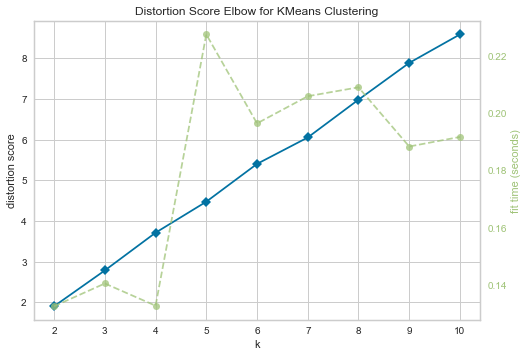

In [11]:
# now using Kmeans with yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
visualiser = KElbowVisualizer(KMeans(),metrics='silhouette',k=[2,11])
visualiser.fit(docs)
visualiser.poof()

In [12]:
# end part 1 find optimal cluster number:
# begin part 2 TSNE and silhouette curves

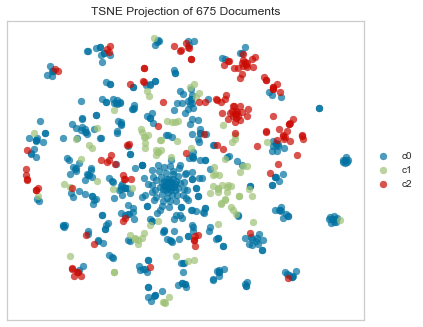

In [13]:
# We can see possible clustering for 3, 6, 8, 10 clusters. 
# Let's draw the TSNE and Silhouette curves for these numbers
clusters = KMeans(n_clusters=3)
clusters.fit(docs)
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(docs, ["c{}".format(c) for c in clusters.labels_])
tsne.poof()

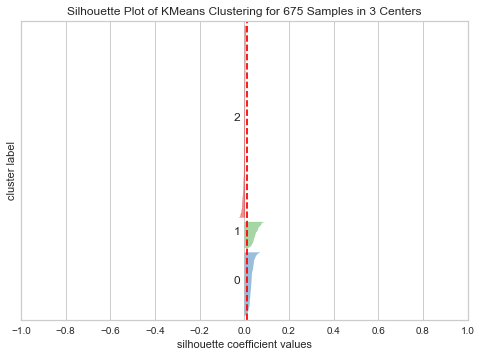

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer
visualiser = SilhouetteVisualizer(KMeans(n_clusters=3))
visualiser.fit(docs)
visualiser.poof()

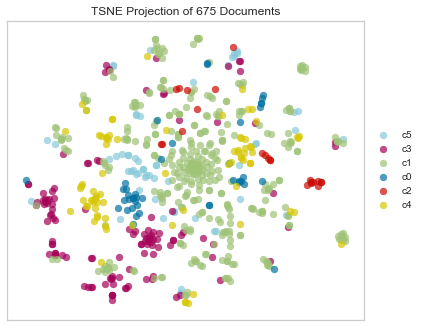

In [15]:
# We can see possible clustering for 3, 6, 8, 10 clusters. 
# Let's draw the TSNE and Silhouette curves for these numbers
clusters = KMeans(n_clusters=6)
clusters.fit(docs)
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(docs, ["c{}".format(c) for c in clusters.labels_])
tsne.poof()

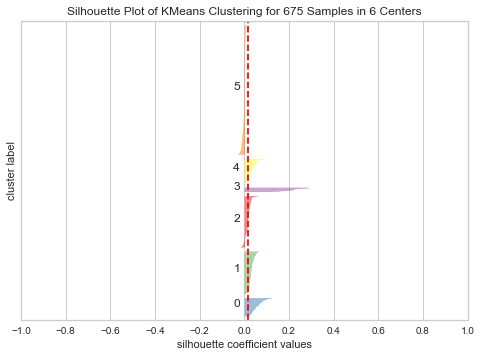

In [16]:
from yellowbrick.cluster import SilhouetteVisualizer
visualiser = SilhouetteVisualizer(KMeans(n_clusters=6))
visualiser.fit(docs)
visualiser.poof()

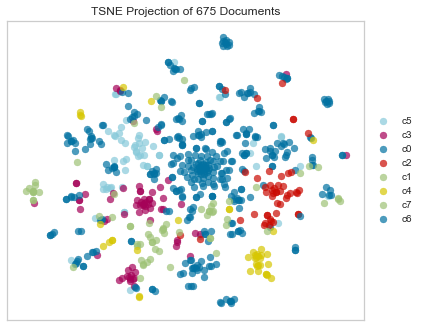

In [17]:
# We can see possible clustering for 3, 6, 8, 10 clusters. 
# Let's draw the TSNE and Silhouette curves for these numbers
clusters = KMeans(n_clusters=8)
clusters.fit(docs)
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(docs, ["c{}".format(c) for c in clusters.labels_])
tsne.poof()

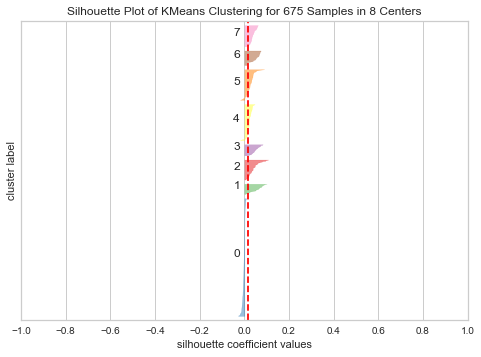

In [18]:
from yellowbrick.cluster import SilhouetteVisualizer
visualiser = SilhouetteVisualizer(KMeans(n_clusters=8))
visualiser.fit(docs)
visualiser.poof()

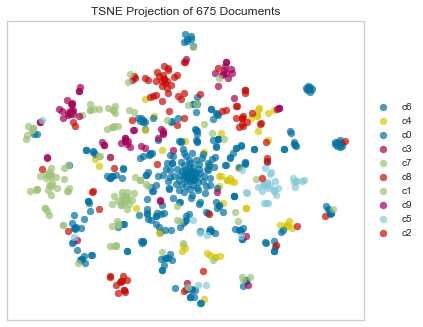

In [19]:
# We can see possible clustering for 3, 6, 8, 10 clusters. 
# Let's draw the TSNE and Silhouette curves for these numbers
clusters = KMeans(n_clusters=10)
clusters.fit(docs)
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(docs, ["c{}".format(c) for c in clusters.labels_])
tsne.poof()

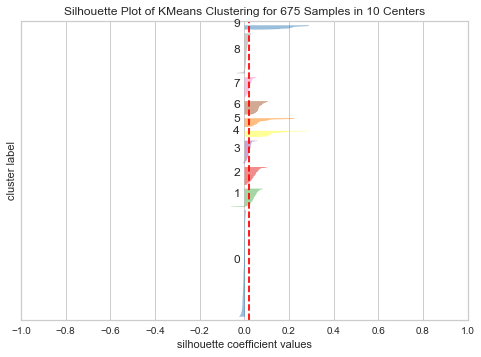

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer
visualiser = SilhouetteVisualizer(KMeans(n_clusters=10))
visualiser.fit(docs)
visualiser.poof()

In [21]:
# End of Unsupervised learning for Slogans
# out of the clustering found, we will start with 3 clusters
# it appears as an elbow in minikmeans and KMeans

In [22]:
# end of part 2 

# end of EDA